# Задание 1
Для ряда пассажирских авиаперевозок постройте прогнозную модель вида (2).
Постройте прогноз на 3 года вперед и отобразите его на графике.
Найдите остатки полученной модели. Является ли ряд остатков стационарным? Для
проверки отобразите его на графике.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import minimize

In [2]:
passengers = pd.read_csv('passengers.csv', index_col='date', parse_dates=True)
passengers

,num_passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


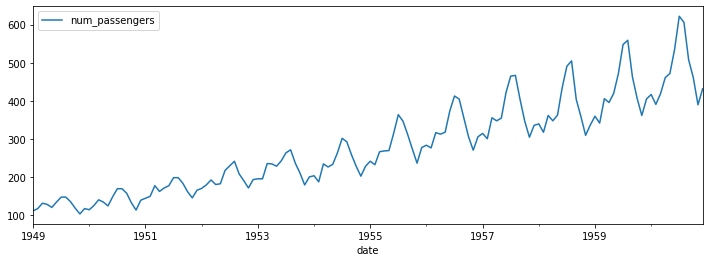

In [3]:
passengers.plot(figsize=(12,4))
plt.show()

### Для ряда пассажирских авиаперевозок постройте прогнозную модель вида (2)

In [4]:
T=np.arange(0, len(passengers), 1)

In [5]:
matrixAdd=np.array([np.ones(len(passengers)),T,np.sin(2*np.pi*(T-1)/12),np.cos(2*np.pi*(T-1)/12)]).transpose()

In [6]:
def fun(a,fi1,fi2,fi3):
    return np.mean((passengers['num_passengers'] - matrixAdd.dot(np.array([a,fi1,fi2,fi3])))**2)

In [7]:
result = minimize(lambda x: fun(x[0], x[1], x[1], x[2]), [0, 0, 0, 0])
a_fi1_fi2_fi3=result.x
result

      fun: 1349.2976806608767
 hess_inv: array([[ 1.87264069e+00, -2.16492278e-02, -4.57478762e-01,
         0.00000000e+00],
       [-2.16492278e-02,  3.30720393e-04,  5.88693819e-03,
         0.00000000e+00],
       [-4.57478762e-01,  5.88693819e-03,  1.03081819e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])
      jac: array([ 0.00000000e+00, -3.05175781e-05,  0.00000000e+00,  0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 329
      nit: 11
     njev: 64
   status: 2
  success: False
        x: array([ 91.72411427,   2.63740555, -36.72467802,   0.        ])

In [8]:
predAdd=matrixAdd.dot(a_fi1_fi2_fi3)

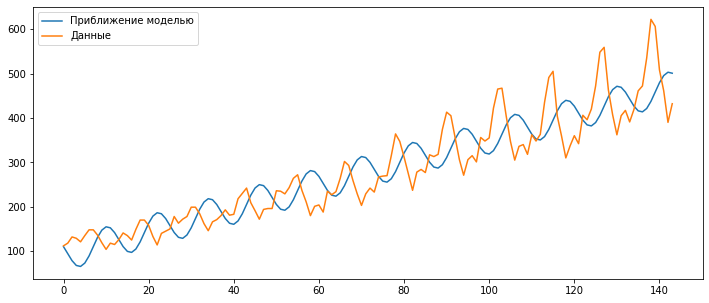

In [9]:
plt.figure(figsize = (12, 5))
plt.plot(predAdd, label = 'Приближение моделью')
plt.plot(passengers.values, label = 'Данные')
plt.legend()
plt.show()

### Постройте прогноз на 3 года вперед и отобразите его на графике.

In [10]:
T2=np.arange(0, len(passengers)+12*3, 1)

In [11]:
matrixAdd2=np.array([np.ones(len(passengers)+12*3),T2,np.sin(2*np.pi*(T2-1)/12),np.cos(2*np.pi*(T2-1)/12)]).transpose()

In [12]:
forecastAdd=matrixAdd2.dot(a_fi1_fi2_fi3)

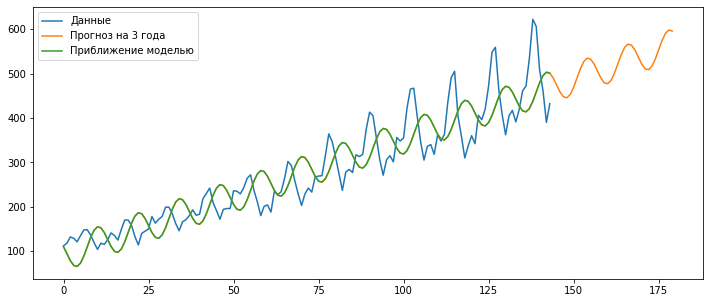

In [13]:
plt.figure(figsize = (12, 5))
plt.plot(passengers.values, label = 'Данные')
plt.plot(forecastAdd, label = 'Прогноз на 3 года')
plt.plot(predAdd, label = 'Приближение моделью')
plt.legend()
plt.show()

### Найдите остатки полученной модели. Является ли ряд остатков стационарным? Для проверки отобразите его на графике.

In [14]:
eAdd=passengers['num_passengers']-predAdd

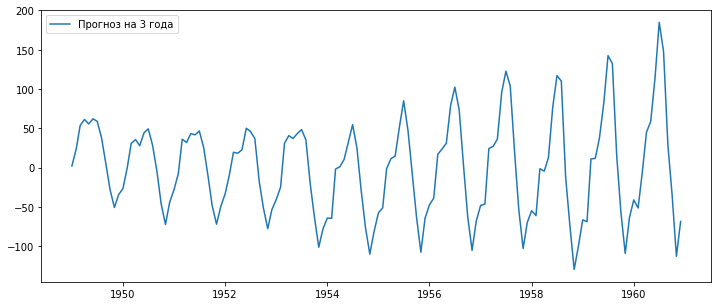

In [15]:
plt.figure(figsize = (12, 5))
plt.plot(eAdd, label = 'Прогноз на 3 года')
plt.legend()
plt.show()

Для проверки стационарности используем так же критерий Дики-Фуллера

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
print("Критерий Дики-Фуллера: p=%f" % adfuller(eAdd)[1])

Критерий Дики-Фуллера: p=0.243110


p-value > 0.05, следовательно ряд остатков не стационарен

# Задание 2
Подумайте, как можно модифицировать модель на случай мультипликативной
сезонности. Постройте соответствующую модель и получите прогноз на 3 года вперед.
Отобразите результат прогнозирования на графике. Как изменились остатки модели?

### Подумайте, как можно модифицировать модель на случай мультипликативной сезонности. Постройте соответствующую модель.

In [18]:
matrixMul=np.array([np.ones(len(passengers['num_passengers'])),T,T*np.sin(2*np.pi*(T-1)/12),T*np.cos(2*np.pi*(T-1)/12)]).transpose()

In [19]:
def fun2 (a,fi1,fi2,fi3):
    return np.mean((passengers['num_passengers'] - matrixMul.dot(np.array([a,fi1,fi2,fi3])))**2)

In [20]:
result = minimize(lambda x: fun2 ( x[0], x[1], x[2], x[3]), [0, 0, 0, 0])
a_fi1_fi2_fi3=result.x
result

      fun: 696.4032946569479
 hess_inv: array([[ 1.98328258e+00, -2.07226514e-02, -4.09534847e-04,
        -3.74739011e-04],
       [-2.07226514e-02,  2.89738803e-04,  8.54961496e-06,
         8.01168711e-06],
       [-4.09534847e-04,  8.54961496e-06,  1.43537032e-04,
         3.48909460e-07],
       [-3.74739011e-04,  8.01168711e-06,  3.48909460e-07,
         1.49626679e-04]])
      jac: array([ 0.00000000e+00,  7.62939453e-06, -7.62939453e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 75
      nit: 11
     njev: 15
   status: 0
  success: True
        x: array([90.63923632,  2.64889208,  0.34675669, -0.53971918])

In [21]:
predMul=matrixMul.dot(a_fi1_fi2_fi3)

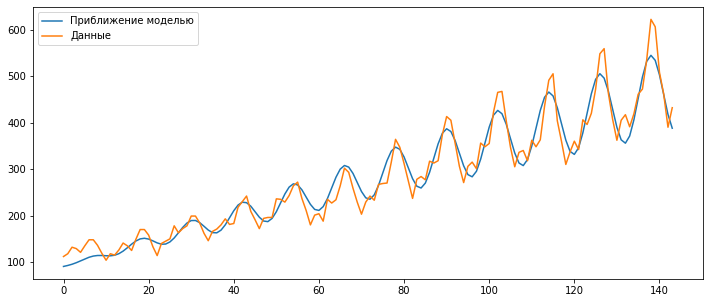

In [22]:
plt.figure(figsize = (12, 5))
plt.plot(predMul, label = 'Приближение моделью')
plt.plot(passengers.values, label = 'Данные')
plt.legend()
plt.show()

### Получите прогноз на 3 года вперед.

In [23]:
matrixMul2=np.array([np.ones(len(passengers)+12*3),T2,T2*np.sin(2*np.pi*(T2-1)/12),T2*np.cos(2*np.pi*(T2-1)/12)]).transpose()

In [24]:
forecastMul=matrixMul2.dot(a_fi1_fi2_fi3)

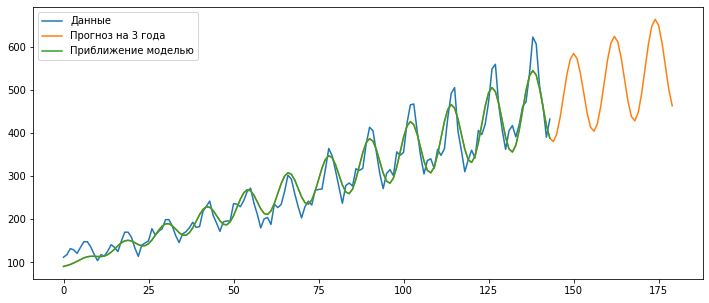

In [25]:
plt.figure(figsize = (12, 5))
plt.plot(passengers.values, label = 'Данные')
plt.plot(forecastMul, label = 'Прогноз на 3 года')
plt.plot(predMul, label = 'Приближение моделью')
plt.legend()
plt.show()

### Как изменились остатки модели?

In [26]:
eMul=passengers['num_passengers']-predMul

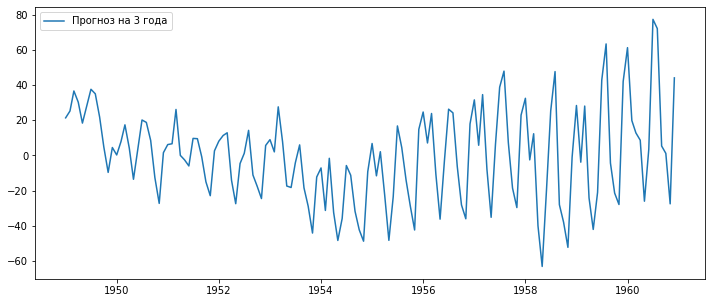

In [27]:
plt.figure(figsize = (12, 5))
plt.plot(eMul, label = 'Прогноз на 3 года')
plt.legend()
plt.show()

Для проверки стационарности используем так же критерий Дики-Фуллера

In [28]:
print("Критерий Дики-Фуллера: p=%f" % adfuller(eMul)[1])

Критерий Дики-Фуллера: p=0.234458


p-value > 0.05, следовательно ряд остатков не стационарен